=== Category Counts ===
category
all_correct               84
only_gpt4                  1
only_baseline              0
only_reasoning             1
gpt4_and_baseline          6
gpt4_and_reasoning         0
baseline_and_reasoning    17
all_wrong                  0
Name: count, dtype: int64 



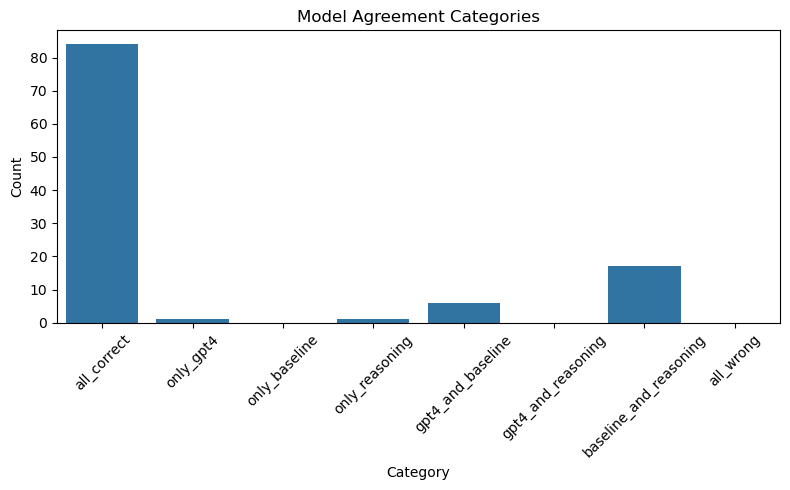

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

# 1) 正しいヘッダー行を読み込む（先頭行をスキップ）
df = pd.read_csv(
    'test_reasoning_compare.csv',
    sep=';',             # セミコロン区切り
    encoding='latin1',   # 文字化け対策
    skiprows=1           # 最初の余分な行をスキップ
)

# 2) 列名を整理
df = df.rename(columns={
    'gpt4_label': 'gpt4_pred',
    'baseline_label': 'gpt2_base_pred',
    'reasoning_enhanced_label': 'gpt2_reas_pred'
})
# int型にキャスト
for col in ['gpt4_pred', 'gpt2_base_pred', 'gpt2_reas_pred']:
    df[col] = df[col].astype(int)

# 3) カテゴリ分け
def categorize(row):
    y = row['label']
    f4 = row['gpt4_pred'] == y
    b2 = row['gpt2_base_pred'] == y
    r2 = row['gpt2_reas_pred'] == y
    if   f4 and b2 and r2: return 'all_correct'
    if   f4 and not b2 and not r2: return 'only_gpt4'
    if   b2 and not f4 and not r2: return 'only_baseline'
    if   r2 and not f4 and not b2: return 'only_reasoning'
    if   f4 and b2 and not r2: return 'gpt4_and_baseline'
    if   f4 and r2 and not b2: return 'gpt4_and_reasoning'
    if   b2 and r2 and not f4: return 'baseline_and_reasoning'
    return 'all_wrong'

df['category'] = df.apply(categorize, axis=1)

# 4) 結果の集計・表示
categories = [
    'all_correct', 'only_gpt4', 'only_baseline', 'only_reasoning',
    'gpt4_and_baseline', 'gpt4_and_reasoning', 'baseline_and_reasoning', 'all_wrong'
]
counts = df['category'].value_counts().reindex(categories, fill_value=0)

print("=== Category Counts ===")
print(counts, "\n")

# 棒グラフ
plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.title('Model Agreement Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.tight_layout()
plt.show()
